# Wstęp
## Cel ćwiczenia
W tym notebooku głównym celem jest żeby poprawnie przeprowadzić "standardowe" ML flow i przypomnieć sobie/ popracować z biblotekami sklearn, numpy, pandas.
Zadanie będzie wymagało zrobienia Exploratory Data Analysis, a następnie na jej podstawie wykonania preprocessingu danych oraz puszczenie modelu.

### Ogólne informacje do zadania:
#### 1. Zbiór danych
czyli to na czym będziemy pracowac w tym zadaniu. Jest to zbiór [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing), na którym do wykonania jest zadanie z klasyfikacji tak jak opisane w repozytorium. Polecam skorzystać z `ucimlrepo` aby go zainstalować.



#### 2. EDA

czyli poznaj swoje dane, a przede wszystkim oceń ich jakość. Potraktuj ten etap jako upewnienie się, że to, co wejdzie do Twojego modelu, jest „czyste” i nie zawiera żadnych niespodziewanych wartości w poszczególnych kolumnach  takich, które w najlepszym przypadku zwróciłyby błąd, a w najgorszym doprowadziły do wytrenowania słabego modelu.
Pamiętaj: *Garbage in, garbage out.* Z pustego nawet Salomon nie naleje, nieważne jak bardzo będziemy dobierać hiperparametry.
Poniżej kilka pomocniczych pytań, które mogą naprowadzić, co należy sprawdzić i na co uważać na etapie EDA:

* czy dane załadowały się prawidłowo
* czy typy kolumn odpowiadają ich zawartości; czy potrzebujemy zmienić typ (np. wiek powinien być w `int`, a nie w typie „object”)
* czy mamy brakujące wartości w jakichś kolumnach- jeśli tak, to co z nimi robimy (usuwamy wiersze? kolumny? uzupełniamy brak?); jeśli uzupełniamy, to w jaki sposób, by było to optymalne. Istnieje kilka prostych metod (mediana, moda, średnia), ale w praktyce coraz częściej korzysta się z bardziej zaawansowanych imputerów (KNN Imputer, MICE itp.)
* czy brakująca wartość to zawsze Null/NaN? Czy dataset może używać innych znaczników braków (np. „?”, „missing”, „-999”)?
* czy wartości w kolumnach mają sens (ujemny wiek, BMI równe 0 itp.) i jak je traktować
* jak wyglądają rozkłady wartości kolumn, czy takich rozkładów się spodziewaliśmy
* czy mamy wartości odstające? Jeśli tak, to czy wynikają one z błędów (np. wzrost człowieka 18.0 m, źle wstawiony przecinek), czy mogą być prawdopodobne w prawdziwym świecie (np. miesięczny zarobek 500 tys. zł)? Co zrobić z takimi outlierami? Jak je wykryć (np. IQR, Z-score, Isolation Forest)?
* czy mamy kolumny wysoko skorelowane ze sobą; czy taka korelacja jest dla naszego modelu korzystna czy szkodliwa; jak ją zwizualizować (np. heatmapa); jak ją rozwiązać (np. usunięcie jednej z kolumn, PCA)
* czy format naszych danych jest „model-friendly”? Czy musimy zastosować jakieś kodowanie zmiennych (np. one-hot encoding, target encoding)?
* czy powinniśmy standaryzować / normalizować dane? Kiedy warto zastosować jedno, a kiedy drugie? Czy są przypadki, gdzie nie należy tego robić, a takie, gdzie jest to absolutnie konieczne?
* czy są kolumny, które na pewno usuniemy, bo nic nie wniosą do modelu albo mogą mu szkodzić (np. ID, kolumny z dużą liczbą unikalnych wartości bez znaczenia semantycznego)
* czy między naszymi danymi zachodzi jakaś istotna statystycznie zależność? Jeśli tak, to wykonajmy testy statystyczne, aby to potwierdzić (np. chi-kwadrat dla zmiennych kategorycznych, ANOVA, testy normalności, testy na homogeniczność wariancji)

Oczywiście nie musicie odpowiadać na wszystkie te pytania, bo nie każdy zbiór będzie wymagał rozwiązywania wszystkich problemów. Warto jednak pamiętać, że zbiór danych to fundament- jego zrozumienie może tylko pomóc w zaprojektowaniu dobrego modelu.

#### 3. Modelowanie

czyli należy wykorzystać ładnie przygotowane dane do zbudowania modelu. Wiadomo, że istnieją modele, które często zapewniają wysokie metryki już „z natury”, np. XGBoost. Warto jednak wziąć pod uwagę, że:

* nie ma co strzelać z armaty do komara- nie bierz XGBoosta, jeśli problem sensownie rozwiązuje regresja logistyczna
* im bardziej interpretowalny model, tym lepiej- zarówno przy dalszym rozwijaniu, jak i przy próbie wdrażania go w systemach produkcyjnych
* przy mniejszych zbiorach trenowanie trwa szybko, więc warto przetestować różne typy modeli i różne konfiguracje hiperparametrów
* wyciek wiedzy (*data leakage*) to jedno z największych ryzyk- kluczowe jest upewnienie się, że żadna informacja z przyszłości (np. ze zbioru testowego, albo z kolumn pochodnych) nie trafi do części treningowej
* w większości modeli mamy co najmniej kilka hiperparametrów, które mogą znacząco wpłynąć na jakość predykcji; powinniśmy je przetestować i dobrać tak, by model osiągał jak najlepsze wyniki
* najbezpieczniej jest używać cross-walidacji- i to na niej dobierać hiperparametry
* obliczenie wielu metryk nie zaszkodzi, natomiast musimy jasno zdefiniować, która metryka jest najważniejsza z perspektywy celu zadania (accuracy? recall? precision? AUC? MAE?)




## **KROKI DO WYKONANIA ZADANIA- minimalny zakres prac (EDA + Modelowanie)**

To zadanie jest wyjątkowo otwarte i można je wykonać na wiele sposobów, w zależności od kreatywności i podejścia. Natomiast istnieje **pewne minimum**, na którym na pewno trzeba się skupić, aby zadanie zostało zaliczone


**EDA (Exploratory Data Analysis)**

* sprawdzenie brakujących danych oraz- jeśli będzie potrzeba- ich uzupełnienie odpowiednią metodą
* sprawdzenie wartości odstających i decyzja, co z nimi zrobić (usunąć, poprawić, zostawić)
* sprawdzenie rozkładów **zmiennej decyzyjnej** oraz najważniejszych zmiennych wejściowych
* zbadanie, jak dokładnie zformatować dane, aby model mógł je poprawnie przyjąć (np. typy danych, kodowanie zmiennych, standaryzacja)
* zbadanie zależności między zmiennymi (np. korelacje, testy statystyczne, analiza współzależności)
* zadbanie o warstwę wizualną tam, gdzie jest to możliwe i pomocne (wykresy, heatmapy, histogramy, boxploty itp.)
* krótki wniosek po EDA- co możemy powiedzieć o danych, co w nich odkryliśmy, jakie są istotne problemy i na co należy uważać podczas modelowania


**MODELOWANIE**

* wybranie minimum **3 różnych modeli** reprezentujących różne rodziny (np. regresja logistyczna, drzewa, modele ensemble, SVM, sieć neuronowa)
* dla każdego modelu sprawdzenie minimum **2 hiperparametrów** (dobieranych na zbiorze walidacyjnym)
* dobór hiperparametrów wykonany za pomocą mechanizmu **cross-walidacji**
* sprawdzenie ostatecznych wyników na **zbiorze testowym**, po zakończeniu strojenia hiperparametrów
* użycie techniki SHAP na dowolnym wytrenowanym modelu w celu zbadania wyjaśnialności- wybrać minimum jeden przykład poprawnej predykcji oraz jeden przykład błędnej, a następnie je zbadać.
* czytelna prezentacja wyników i metryk (tabela porównawcza, wykresy, krótki komentarz)
* wnioski i konkluzje z eksperymentu- który model działa najlepiej, dlaczego, jakie są ograniczenia, co można poprawić

**WAŻNE UWAGI DO ZADANIA**

* Pamiętajcie, że analizę zbioru wykonujemy na **całym dostępnym zbiorze danych**. **Natomiast** kiedy przechodzimy do transformacji zbioru danych (standaryzacja, uzupełnianie brakujących danych itp.), wykonujemy ją **wyłącznie na podstawie rozkładu zbioru *trenującego***.
  Przykładowo: parametry używane do standaryzacji kolumn obliczamy na zbiorze trenującym, a następnie stosujemy je do zbioru walidacyjnego i testowego. W przeciwnym przypadku dochodzi do **wycieku wiedzy** (więcej informacji w materiałach dodatkowych).

* Biblioteka `sklearn` jest dobrze przystosowana do takiego scenariusza dzięki wykorzystaniu tzw. obiektów **Pipeline**. Użycie ich nie jest wymagane, ale może ułatwić pisanie kodu oraz pomóc w uniknięciu wycieku wiedzy.

* Do wykonania zadania powinny wystarczyć standardowe biblioteki pythonowe, wymienione poniżej. Oczywiście nie trzeba się do nich ograniczać — można korzystać również z innych:

  * **sklearn** – podstawowa biblioteka do ML w Pythonie. Posiada prosty i intuicyjny interfejs i zawiera większość potrzebnych operacji.
  * **pandas** – do operacji na danych tabelarycznych.
  * **matplotlib / seaborn** – do wizualizacji.
  * **numpy** – do obliczeń i transformacji matematycznych (większość kluczowych bibliotek opiera się na NumPy).
  * **statistics** – operacje statystyczne.


Dodatkowe materiały:
- [modele w sklearnie](https://scikit-learn.org/stable/supervised_learning.html)
- [jeden z tutorialów do EDA](https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6)
- [co to wyciek danych](https://www.ibm.com/think/topics/data-leakage-machine-learning)
- [niezbalansowane dane](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets)
- [wyjaśnialność za pomocą SHAP-a](https://shap.readthedocs.io/en/latest/)
- [brakujące wartości](https://medium.com/@ajayverma23/data-imputation-a-comprehensive-guide-to-handling-missing-values-b5c7d11c3488)
- [wizualizacja wielowymiarowych danych w 2D](https://medium.com/@laakhanbukkawar/pca-vs-t-sne-vs-umap-visualizing-the-invisible-in-your-data-92cb2baebdbb)
- [wartości odstające](https://www.geeksforgeeks.org/data-analysis/what-is-outlier-detection/)
- [cross validacja](https://scikit-learn.org/stable/modules/cross_validation.html)
- [pipelines w sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
- [OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- cała dokumentacja sklerana

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

print(bank_marketing.metadata)

print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.concat([X, y], axis=1)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


# 1. Sprawdzam komórki - szukamy outlinerów i brakujących wartości

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


Sprawdzamy zależności między poutcome a innymi zmiennymi.

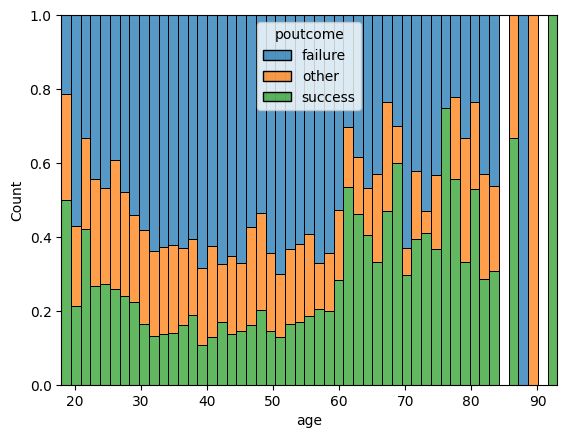

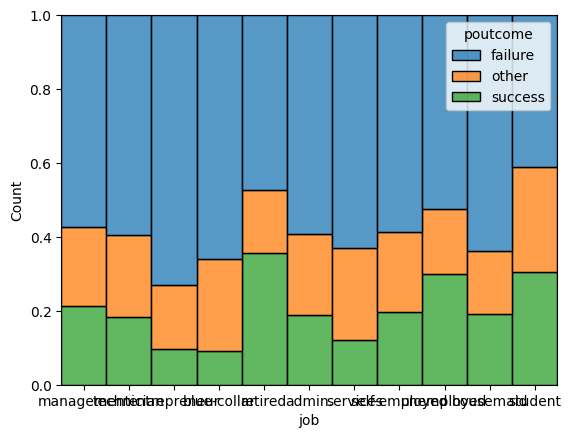

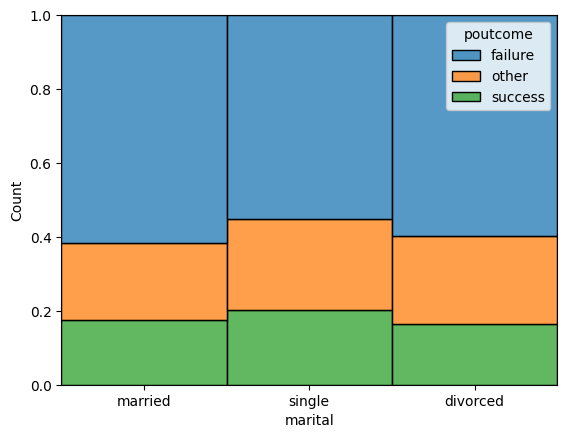

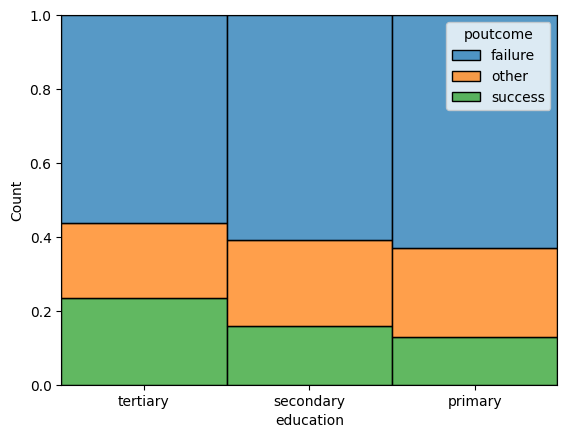

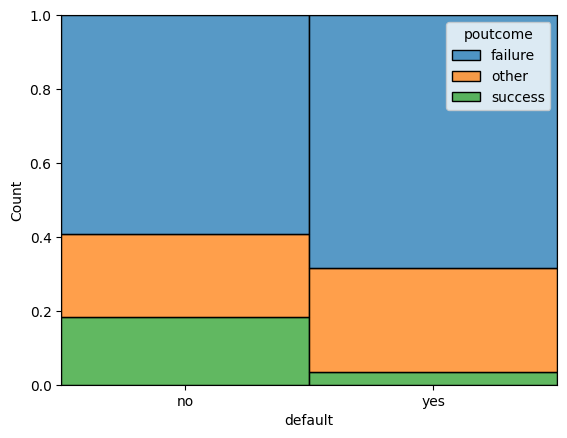

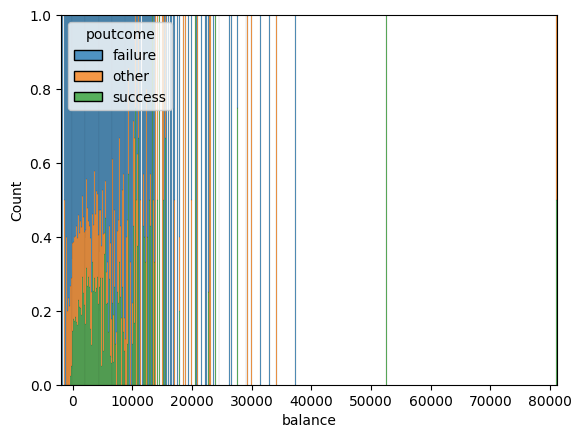

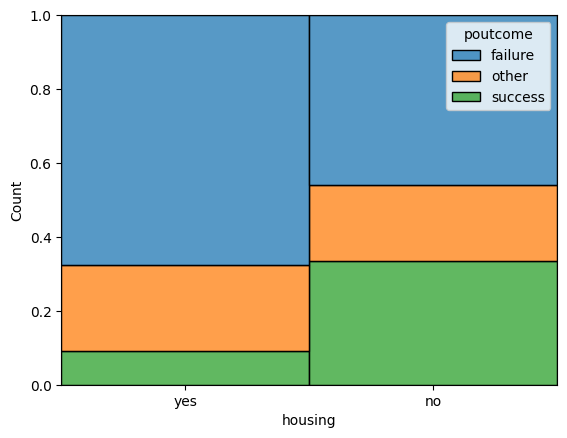

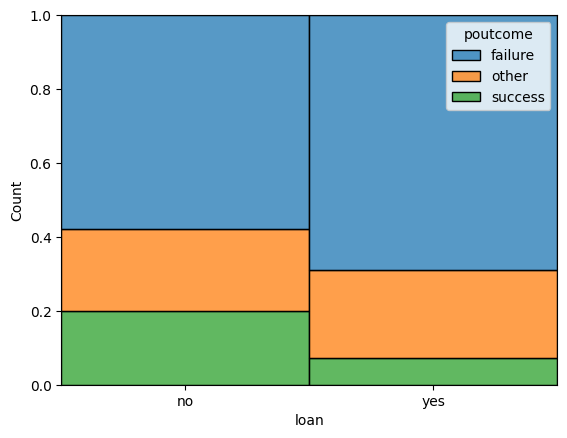

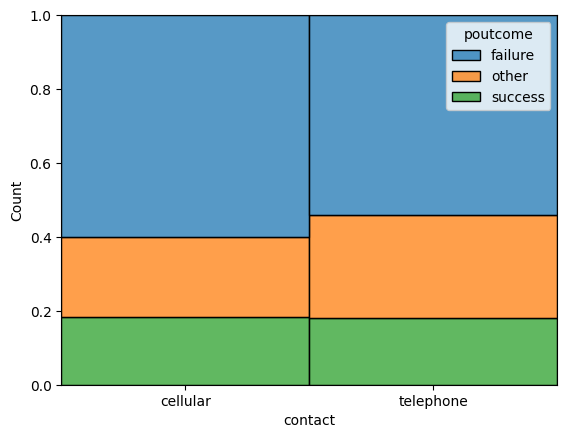

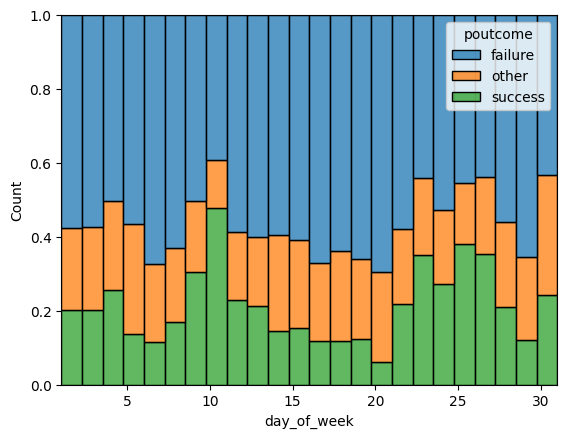

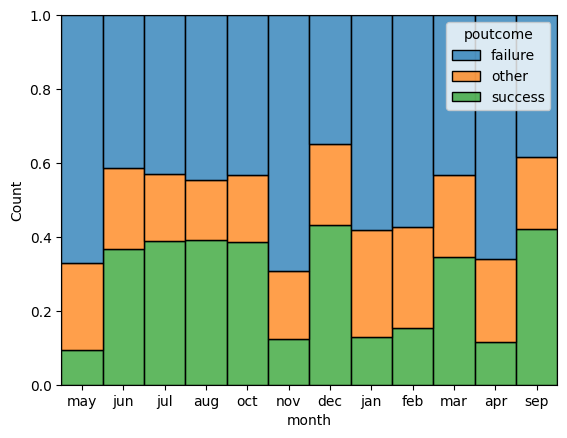

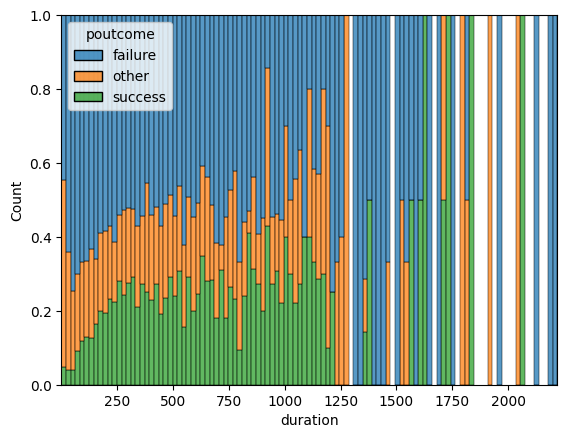

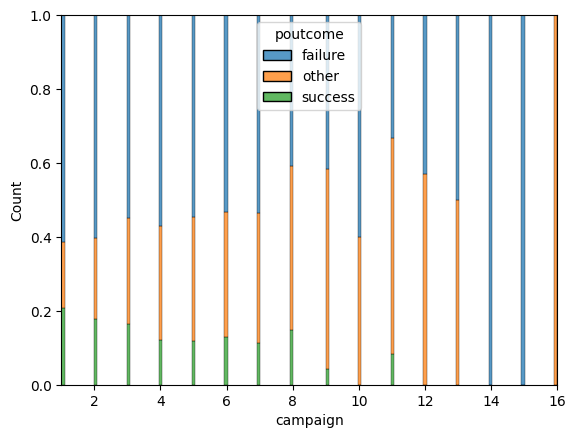

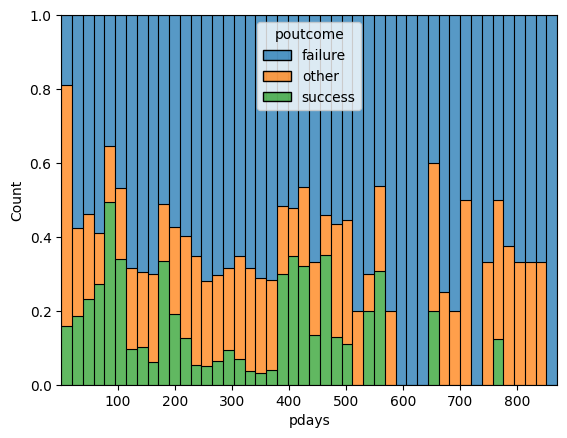

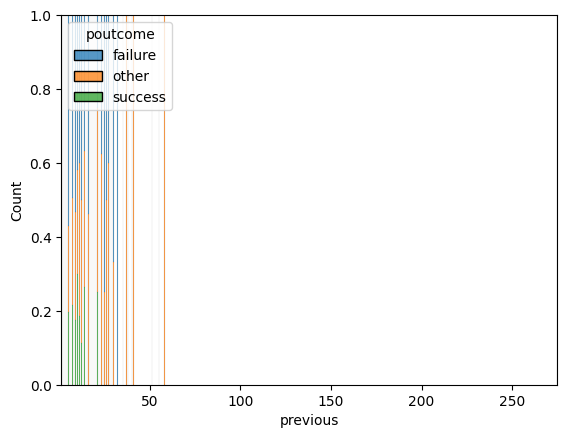

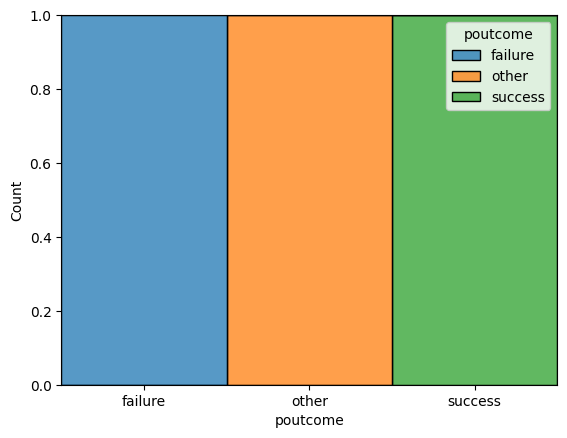

In [ ]:
for i, col in enumerate(X.columns):
  plt.figure()
  sns.histplot(data=X, x=col, hue="poutcome", multiple="fill")
  plt.show()

Widzimy braki w poutcome i contact.

Z racji, że poutcome to istotne pole, należy uzupełnić braki kategorią unknown.
To samo robię z kategorią job.

Kolumny do usunięcia:
- duration - dane po kontakcie, w momencie przewidywania są jeszcze nieznane
- education - ważniejszy w zbiorze jest zawód niż sama edukacja
- contact - ma małe znaczenie
- day_of_week - mniejsza decyzyjność od month

In [ ]:
df = df.drop(['duration','education','contact', 'day_of_week'],axis=1)

In [ ]:
df["poutcome"] = df["poutcome"].fillna("unknown")
df["job"] = df["job"].fillna("unknown")

Przyda nam się lepszy wykres dot. zawodów

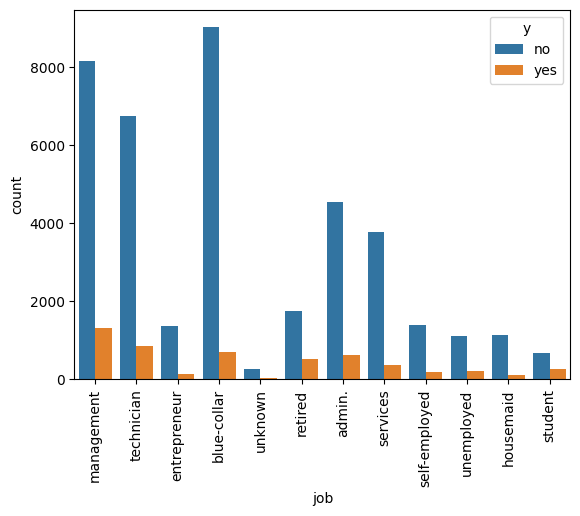

In [ ]:
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=90)
plt.show()

Wychodzi na to, że procentowo największy pozytywny wynik wystąpił w kategorii 'student'.

Teraz zajmę się korekcją typów.

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
default,object
balance,int64
housing,object
loan,object
month,object
campaign,int64
pdays,int64


In [ ]:
binary_cols = ["default", "housing", "loan", "y"]
df[binary_cols] = df[binary_cols].replace({"yes": 1, "no": 0})

/tmp/ipython-input-1741646598.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"yes": 1, "no": 0})


In [ ]:
df['poutcome'] = df['poutcome'].map({'success': 1, 'failure': 0, 'unknown': -1})

In [ ]:
df = df.convert_dtypes()

In [ ]:
df.dtypes

,0
age,Int64
job,string[python]
marital,string[python]
default,Int64
balance,Int64
housing,Int64
loan,Int64
month,string[python]
campaign,Int64
pdays,Int64


Teraz sprawdzę korelację między kolumnami za pomocą macierzy korelacyjnej

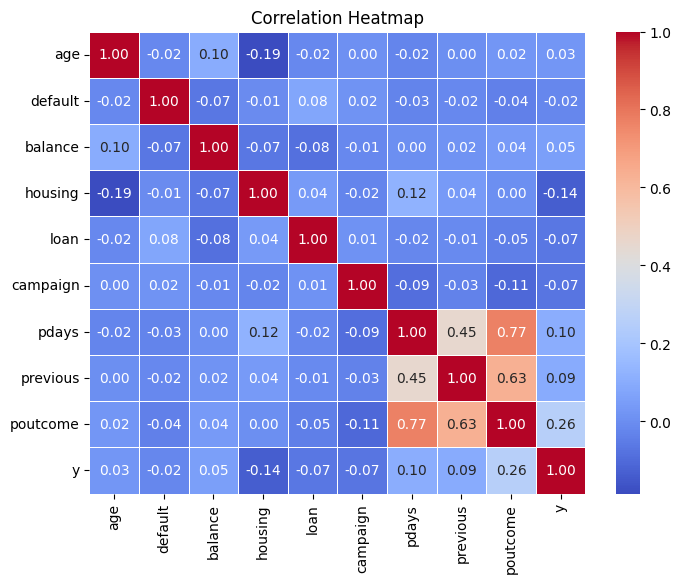

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Widać dużą zależność między zmiennymi pdays, previous oraz poutcome. Możemy więc wyznaczyć kolumnę 'contacted_before'. Z opisu danych wiadomo, że dla pdays = -1 nie było kontaktu.

In [ ]:
df["contacted_before"] = df["pdays"].apply(lambda x: 0 if x == -1 else 1)
df[["pdays", "contacted_before"]].head()

,pdays,contacted_before
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


In [ ]:
df = df.drop(['pdays', 'poutcome', 'previous'],axis=1)

In [ ]:
df.convert_dtypes()

,age,job,marital,default,balance,housing,loan,month,campaign,y,contacted_before
0,58,management,married,0,2143,1,0,may,1,0,0
1,44,technician,single,0,29,1,0,may,1,0,0
2,33,entrepreneur,married,0,2,1,1,may,1,0,0
3,47,blue-collar,married,0,1506,1,0,may,1,0,0
4,33,unknown,single,0,1,0,0,may,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,0,825,0,0,nov,3,1,0
45207,71,retired,divorced,0,1729,0,0,nov,2,1,0
45208,72,retired,married,0,5715,0,0,nov,5,1,1
45209,57,blue-collar,married,0,668,0,0,nov,4,0,0


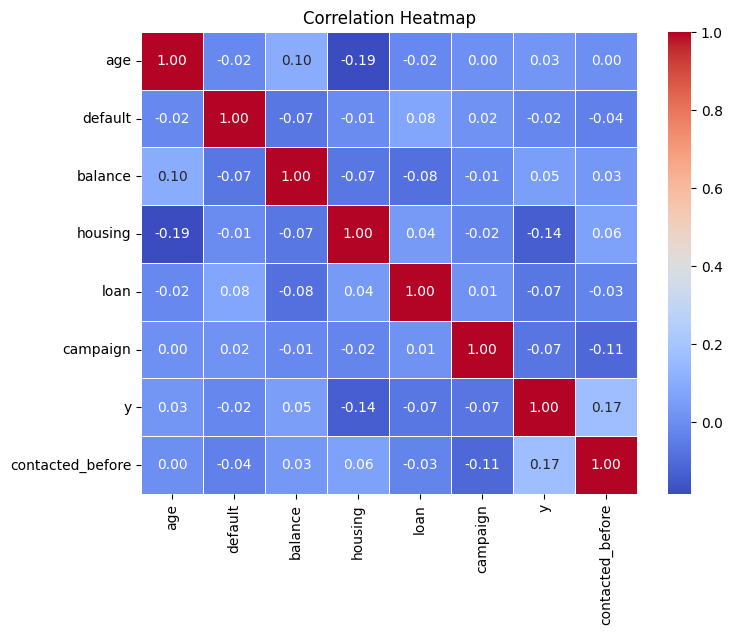

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Modele

Wybór modeli: logistic regression, decision tree, KNN.

Standaryzacja, podział na dane treningowe i testowe.

One-hot encoding zmiennych kategorycznych:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
  transformers=[
    ('num', StandardScaler(), ['age', 'balance', 'campaign']),
    ('bin', 'passthrough', ['default', 'housing', 'loan', 'contacted_before']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['job', 'marital', 'month'])
  ]
)

In [ ]:
new_X = df.drop("y", axis=1)
new_y = df["y"]

In [ ]:
df.dtypes

,0
age,Int64
job,string[python]
marital,string[python]
default,Int64
balance,Int64
housing,Int64
loan,Int64
month,string[python]
campaign,Int64
y,Int64


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    new_X, new_y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline_lr = Pipeline([
  ('preprocessor', preprocessor),
  ('lr', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
  'lr__C': [0.01, 0.1, 1, 10, 100],
  'lr__penalty': ['l2'],
  'lr__solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best LR params:", grid_lr.best_params_)
print("Best LR CV score:", grid_lr.best_score_)

Best LR params: {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best LR CV score: 0.8842070340754201


In [ ]:
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'dt__max_depth': [None, 5, 10, 20],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
}

grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=cv, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best DT params:", grid_dt.best_params_)
print("Best DT CV score:", grid_dt.best_score_)

Best DT params: {'dt__max_depth': 5, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 5}
Best DT CV score: 0.8820780604180278


In [ ]:
pipeline_knn = Pipeline([
  ('preprocessor', preprocessor),
  ('knn', KNeighborsClassifier())
])

param_grid_knn = {
  'knn__n_neighbors': list(range(3, 7, 2)),
  'knn__weights': ['uniform', 'distance'],
  'knn__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best KNN params:", grid_knn.best_params_)
print("Best KNN CV score:", grid_knn.best_score_)

Best KNN params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Best KNN CV score: 0.8777373434456497


Dobraliśmy hiperparametry do modeli, teraz wypróbujemy je w przewidywaniach.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      7985
         1.0       0.57      0.08      0.13      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.53      0.54      9043
weighted avg       0.85      0.89      0.84      9043

Confusion Matrix:
 [[7924   61]
 [ 978   80]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      7985
         1.0       0.40      0.02      0.03      1058

    accuracy                           0.88      9043
   macro avg       0.64      0.51      0.48      9043
weighted avg       0.83      0.88      0.83      9043

Confusion Matrix:
 [[7959   26]
 [1041   17]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7985
         1.0       0.47      0.15      0.23      1058

    accuracy      

Najwięcej accuracy otrzymaliśmy w regresji logistycznej, a z wybranych modeli, ten właśnie był najszybszy w działaniu.

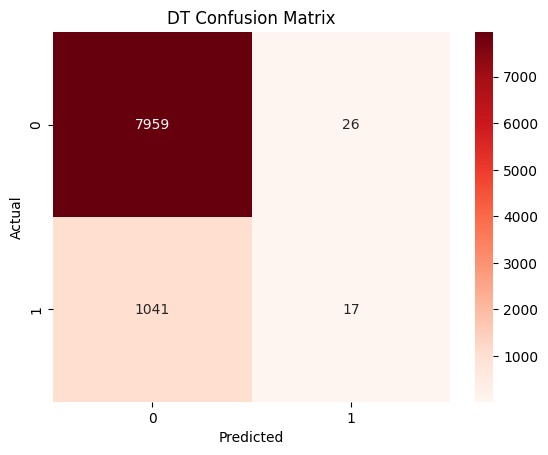

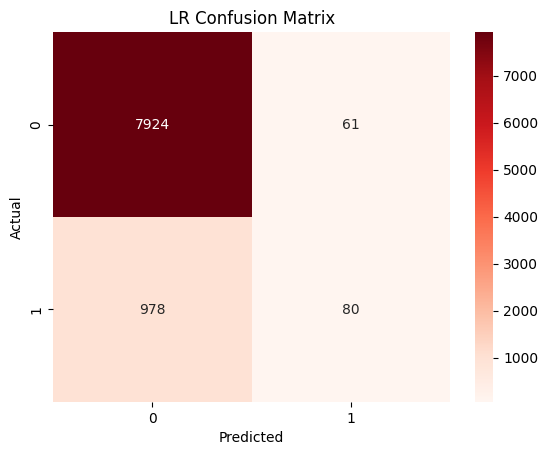

In [ ]:
cm = confusion_matrix(y_test, best_dt.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DT Confusion Matrix")
plt.show()

cm = confusion_matrix(y_test, best_lr.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LR Confusion Matrix")
plt.show()

Najważniejsze kolumny według modelu dt

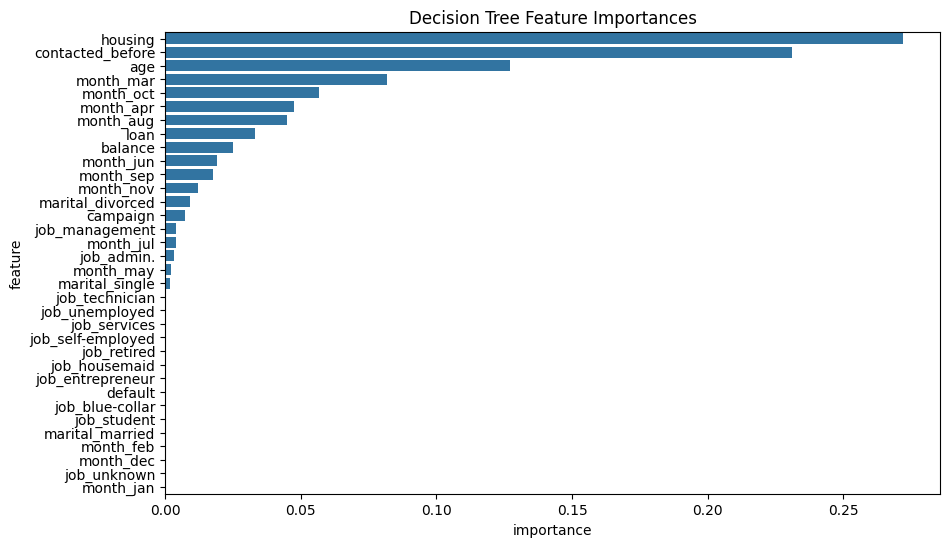

In [ ]:
fitted_preprocessor = best_dt.named_steps['preprocessor']

categorical_features = ['job', 'marital', 'month']
feature_names_cat = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

numeric_features = ['age', 'balance', 'campaign']
binary_features = ['default', 'housing', 'loan', 'contacted_before']
all_features = np.concatenate([numeric_features + binary_features, feature_names_cat])

importances = best_dt.named_steps['dt'].feature_importances_

df_imp = pd.DataFrame({'feature': all_features, 'importance': importances}).sort_values(by='importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=df_imp)
plt.title("Decision Tree Feature Importances")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/wdrozenie_ml/bank_dataframe.csv')